In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [20]:
dataset = load_digits()
print(dataset['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
X = pd.DataFrame(dataset['data'], columns=dataset['feature_names'])

In [5]:
Y = pd.DataFrame(dataset['target'], columns=['number'])

In [6]:
img = X.values[0].astype(np.uint8)

In [13]:
img = img.reshape((8, 8))

In [45]:
X.values[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

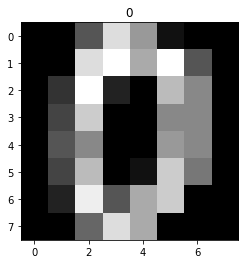

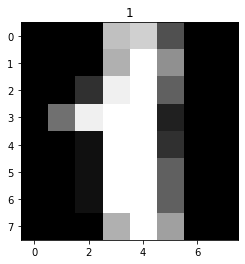

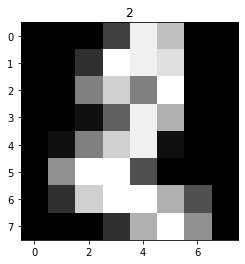

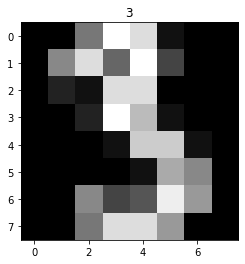

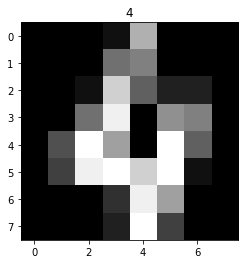

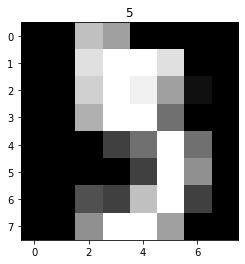

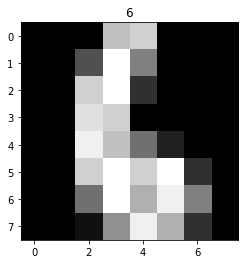

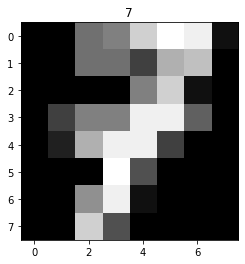

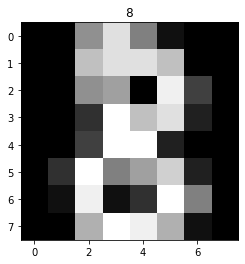

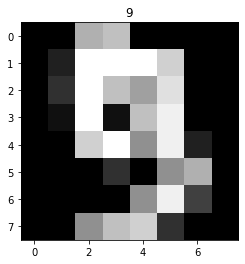

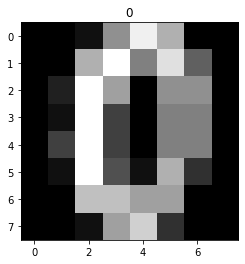

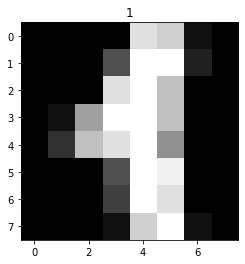

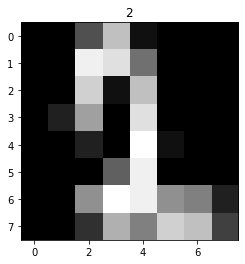

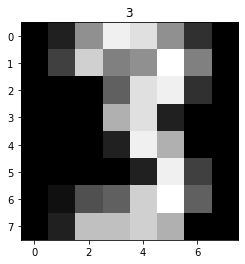

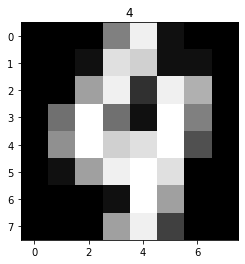

In [15]:
for i in range(15):
    img = X.values[i].astype(np.uint8).reshape((8, 8))
    plt.title(Y.values[i][0])
    plt.imshow(img,cmap='gray')
    plt.show()

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=0)

In [18]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        45
           1       0.82      0.77      0.79        52
           2       0.85      0.83      0.84        53
           3       0.75      0.76      0.75        54
           4       0.88      0.92      0.90        48
           5       0.93      0.89      0.91        57
           6       0.92      0.90      0.91        60
           7       0.85      0.83      0.84        53
           8       0.72      0.64      0.68        61
           9       0.71      0.84      0.77        57

    accuracy                           0.83       540
   macro avg       0.83      0.83      0.83       540
weighted avg       0.83      0.83      0.83       540



In [31]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

tree = RandomForestClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print(classification_report(y_test, y_pred))

<ipython-input-31-f39687e5c49e>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  tree.fit(X_train, y_train)


              precision    recall  f1-score   support

           0       0.98      1.00      0.99        45
           1       0.96      1.00      0.98        52
           2       1.00      0.96      0.98        53
           3       0.96      1.00      0.98        54
           4       1.00      0.98      0.99        48
           5       0.98      0.96      0.97        57
           6       0.98      1.00      0.99        60
           7       0.98      1.00      0.99        53
           8       1.00      0.95      0.97        61
           9       0.98      0.98      0.98        57

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



In [38]:
import warnings
warnings.filterwarnings("ignore")

In [41]:
from sklearn.metrics import f1_score

n_estimators_list = list(range(1, 1000, 10))
f1score_list = []

for n_estimtors in n_estimators_list:
    print(n_estimtors)
    tree = RandomForestClassifier(n_estimators=n_estimtors, n_jobs=-1)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    f1score_list.append(f1_score(y_test, y_pred, average='weighted'))

1
11
21
31
41
51
61
71
81
91
101
111
121
131
141
151
161
171
181
191
201
211
221
231
241
251
261
271
281
291
301
311
321
331
341
351
361
371
381
391
401
411
421
431
441
451
461
471
481
491
501
511
521
531
541
551
561
571
581
591
601
611
621
631
641
651
661
671
681
691
701
711
721
731
741
751
761
771
781
791
801
811
821
831
841
851
861
871
881
891
901
911
921
931
941
951
961
971
981
991


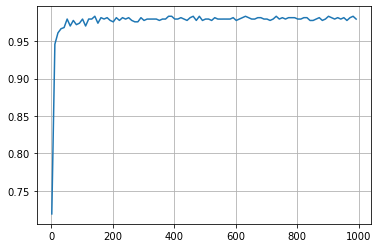

In [42]:
plt.figure()
plt.plot(n_estimators_list, f1score_list)
plt.grid()
plt.show()

In [43]:
f1score_list[-1]

0.9795555206932287

In [53]:
img = cv2.imread('Documents/pixil-frame-0.png')

In [60]:
img

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0

In [55]:
print(img[:, :, 0])

[[  0   0   0   0   0   0   0   0]
 [  0   0   0 255 255   0   0   0]
 [  0   0 255 255 255   0   0   0]
 [  0   0   0   0 255   0   0   0]
 [  0   0   0   0 255   0   0   0]
 [  0   0   0   0 255   0   0   0]
 [  0   0 255 255 255 255   0   0]
 [  0   0   0   0   0   0   0   0]]


In [57]:
img[:, :, 0].ravel()

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255,
         0,   0,   0,   0,   0, 255, 255, 255,   0,   0,   0,   0,   0,
         0,   0, 255,   0,   0,   0,   0,   0,   0,   0, 255,   0,   0,
         0,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0, 255, 255,
       255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
      dtype=uint8)

In [59]:
tree.predict([img[:, :, 0].ravel()])

array([1])

In [61]:
tree

RandomForestClassifier(n_estimators=991, n_jobs=-1)